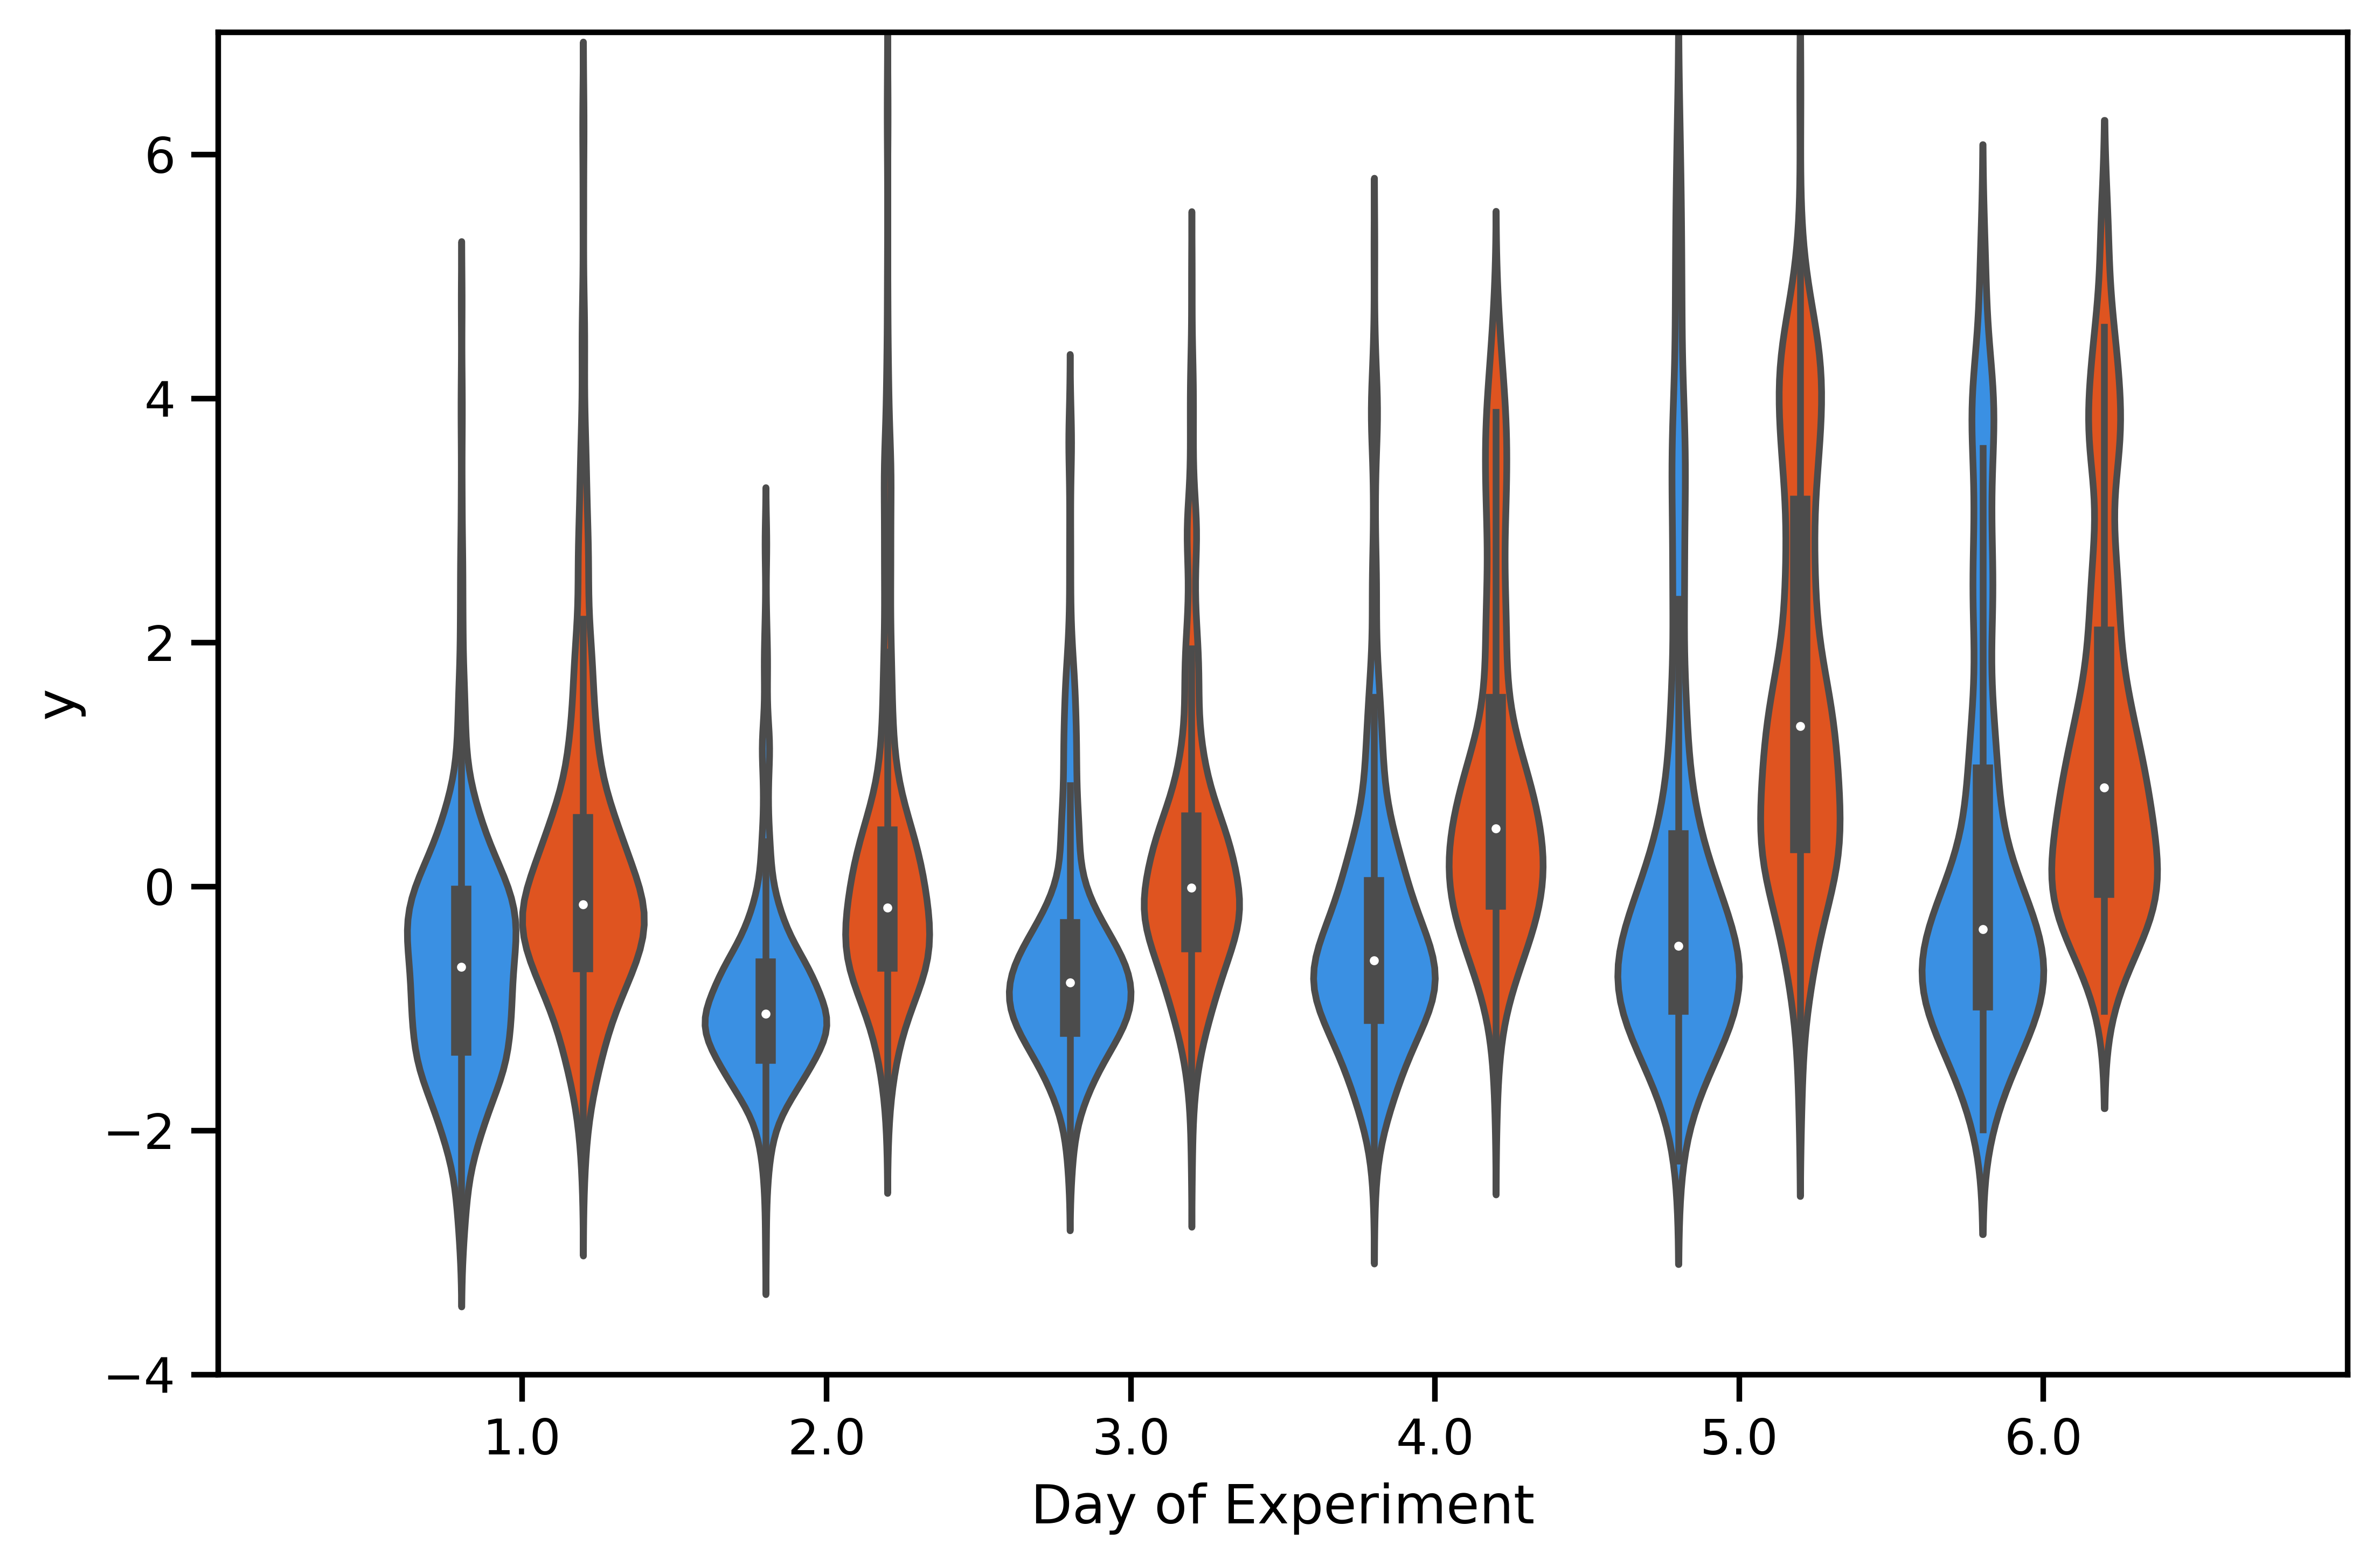

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

# Set the data
collapse_hours = np.array([117, 80, 148, 120, 97, 163, 187, 147, 151, 102, 90, 157, 101, 75, 140,
    85, 94, 116, 113, 104, 78, 106, 56, 91, 73, 114, 124, 121, 120, 99, 101, 32, 155, 117,
    100, 81, 101, 72, 124, 144, 116, 115, 89, 126, 163, 48, 98])

hour_indexer = np.full((47,8,24), np.nan)
hind = 1

for exp_hour in range(1, np.max(collapse_hours) + 1):
    day = (exp_hour - 1) // 24 + 1
    hour = exp_hour % 24
    if hour == 0:
        hour = 24
    for flid in range(47):
        if exp_hour > collapse_hours[flid]:
            continue
        hour_indexer[flid, day - 1, hour - 1] = hind
        hind += 1

# Load the scores
mat = loadmat('data/lts_pcs_scores.mat')
pc_scores = mat['pc_scores']

x = np.full(5151, np.nan)
y = pc_scores[:, 2]
groups = np.full(5151, np.nan)  # Additional variable for groups

fxs = np.array([1,2,3,4,5,6])

for flid in range(47):
    for day in range(6):
        for hour in range(24):
            if np.isnan(hour_indexer[flid, day, hour]):
                continue
            if flid < 24:
                x[int(hour_indexer[flid, day, hour]) - 1] = fxs[day]
                groups[int(hour_indexer[flid, day, hour]) - 1] = 1  # Group 1
            else:
                x[int(hour_indexer[flid, day, hour]) - 1] = fxs[day]
                groups[int(hour_indexer[flid, day, hour]) - 1] = 2  # Group 2

# convert x, y and groups into pandas dataframe
df = pd.DataFrame({
    'x': x,
    'y': y,
    'groups': groups
})

df = df.dropna()  # remove rows with NaN values

# plot
fig, ax = plt.subplots(1, 1, figsize=(8.5, 5.5), dpi=600)  # Change to your preferred dimensions
colors = ["dodgerblue", "orangered"]
# sns.swarmplot(x="x", y="y", hue="groups", data=df, palette=sns.color_palette(colors))

sns.violinplot(x="x", y="y", hue="groups", data=df, palette=sns.color_palette(colors), alpha=0.2,bw=0.25,ax=ax)
# sns.set_theme(style="")

ax.set_xlabel('Day of Experiment')
ax.set_xticks([0, 1, 2, 3, 4, 5], ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6'])
ax.set_ylabel('Projection onto PC3')
ax.set_xlim([-1, 6])
ax.set_ylim([-4, 7])
plt.legend().remove()  # remove legend
plt.show()


In [14]:
y

array([-0.52492134, -1.67406532, -2.89630021, ...,         nan,
               nan,         nan])